# Feature Extraction by Pyradiomics
### By using cMagic_T2 data
- Result : Save Extracted Feature's Values to CSV

In [ ]:
!pip install SimpleITK


In [ ]:
!python -m pip install pyradiomics

In [ ]:
## Download the zip file if it does not exist
## Import some libraries
import os, zipfile
import pandas as pd
import seaborn as sns
from six.moves import urllib
import SimpleITK as sitk
from radiomics import featureextractor

In [ ]:
## Set the Path
path = '/content/drive/My Drive/neobrain_radiomics/data/'
folder = '/content/drive/My Drive/neobrain_radiomics/data/'
Input_folder = os.listdir(folder)

## Parameter folder(./data/exampleMR_5mm.yaml)
params = os.path.join(os.getcwd(), '/content/drive/My Drive/neobrain_radiomics/pyradiomics_yaml/', 'exampleMR_5mm_norm150_resam5_sig5.yaml')
extractor = featureextractor.RadiomicsFeatureExtractor(params)

## Set the patient ids(folder names)
patient_id = []

for i in range(1,len(Input_folder)+1):
    if i<=9:
        patient_id.append('g0000'+str(i))
    else:
        patient_id.append('g000'+str(i))


print(patient_id)

## Remove patient id if T1 image data is not exist
for case_id in patient_id :
    if os.path.exists(path+case_id+"/"+"cMAGIC_T2.nii.gz") == False :
        patient_id.remove(case_id)
print(patient_id)

## Extract Features

features = {}

for case_id in patient_id :
    image = sitk.ReadImage(path + case_id+"/"+"cMAGIC_T2.nii.gz")
    label = sitk.ReadImage(path + case_id+"/"+"cMAGIC_T2_wm_v4.nii.gz")
    features[case_id] = extractor.execute(image,label)







In [ ]:
## Function to make each arrays of one patient id
def extractDigits(lst): 
    res = [] 
    for el in lst: 
        sub = el.split(', ') 
        res.append(sub) 
      
    return(res) 
  
patient = extractDigits(patient_id)


print(patient)

In [ ]:
## Get all Feature Names (#960)
feature_names0 = list(sorted(filter ( lambda k: k.startswith("original_"), features['g00001'])))  #key&value(dictionary)
feature_names1 = list(sorted(filter ( lambda k: k.startswith("wavelet-"), features['g00001'])))  #key&value(dictionary)
feature_names2 = list(sorted(filter ( lambda k: k.startswith("log-sigma-"), features['g00001'])))  #key&value(dictionary)

feature_names=feature_names0+feature_names1+feature_names2


## Make a numpy array of all the extracted feature's values

import numpy as np

samples = np.zeros((len(patient_id),len(feature_names)))

for case_id in patient_id:
    a = np.array([])
#  a = np.append(a,case_id)
    for feature_name in feature_names:
        a = np.append(a, features[case_id][feature_name])
    samples[patient_id.index(case_id),:]=a


## May have NaNs
samples = np.nan_to_num(samples)

########
data=samples
data =np.append(patient,data,axis=1)

## save result to csv file
first_row=feature_names[:]
first_row.insert(0,'Patient ID')
print(first_row)

import csv

f = open('/content/drive/My Drive/neobrain_radiomics/csv/T2.csv','w', newline="")
wr = csv.writer(f)
wr.writerow(first_row)

for i in range(len(patient_id)):
    wr.writerow(data[i,:])

f.close()

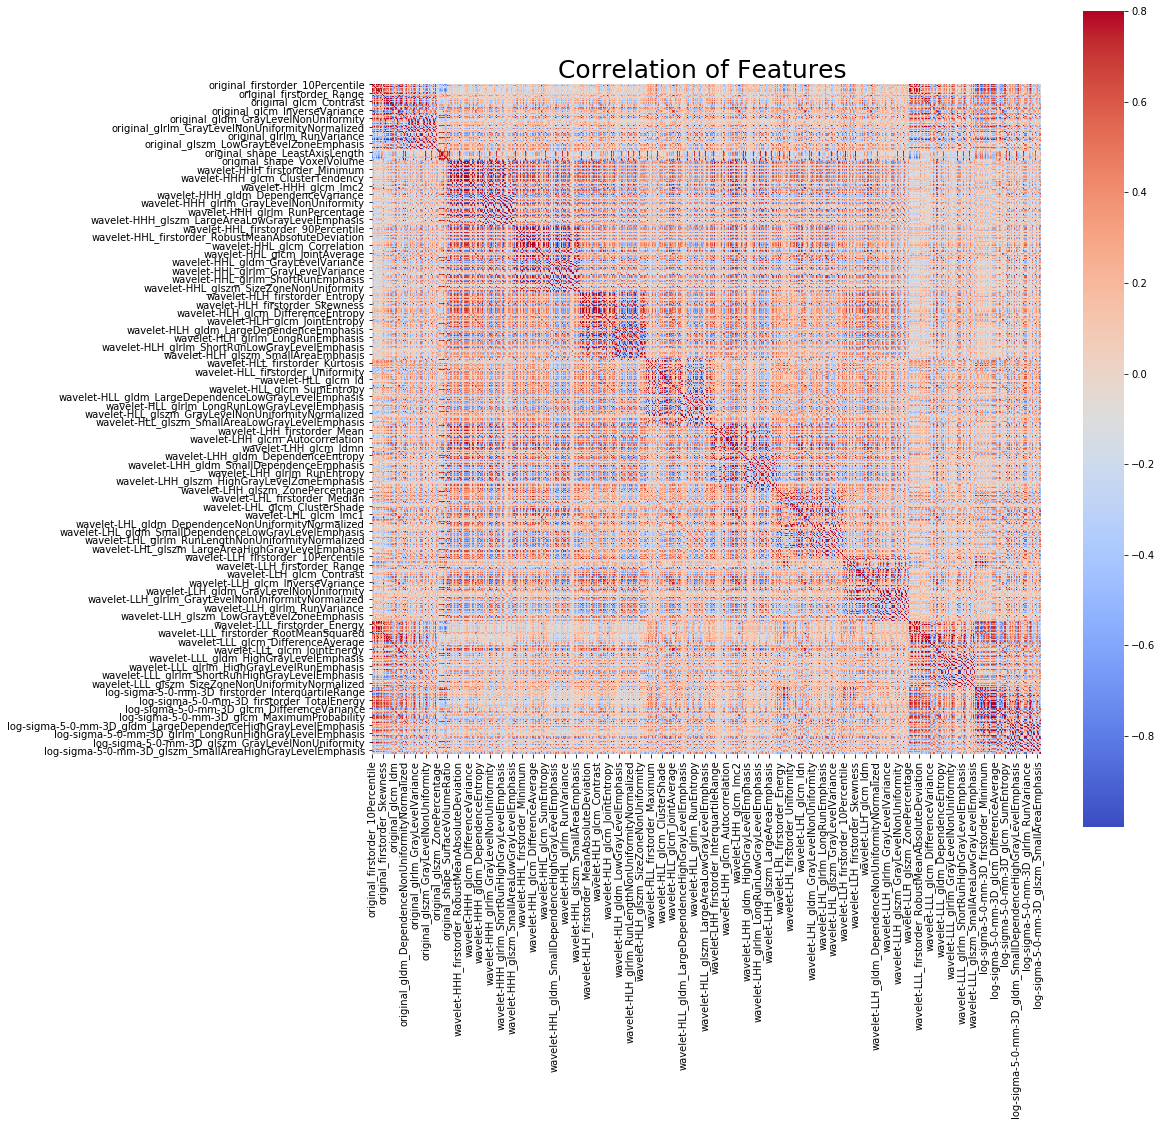

In [ ]:
## Draw the Heatmap_ Correlation of Features

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)
corr = d.corr()
  
# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=.8 , cmap='coolwarm', square=True)
plt.title("Correlation of Features ", fontsize = 25)
plt.show()